<a href="https://colab.research.google.com/github/rishhhkumar/Musical-Instrument/blob/main/MusicalInstrument.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracting Data

In [1]:
import os
from google.colab import drive

In [2]:
MOUNTPOINT = '/content/gdrive/'

drive.mount(MOUNTPOINT)

Mounted at /content/gdrive/


In [3]:
!cp /content/gdrive/MyDrive/DeepLearning/archive.zip /content
!unzip archive.zip
!rm archive.zip
drive.flush_and_unmount()

Streaming output truncated to the last 5000 lines.
  inflating: test/harmonica/4.jpg    
  inflating: test/harmonica/5.jpg    
  inflating: test/harp/1.jpg         
  inflating: test/harp/2.jpg         
  inflating: test/harp/3.jpg         
  inflating: test/harp/4.jpg         
  inflating: test/harp/5.jpg         
  inflating: test/marakas/1.jpg      
  inflating: test/marakas/2.jpg      
  inflating: test/marakas/3.jpg      
  inflating: test/marakas/4.jpg      
  inflating: test/marakas/5.jpg      
  inflating: test/ocarina/1.jpg      
  inflating: test/ocarina/2.jpg      
  inflating: test/ocarina/3.jpg      
  inflating: test/ocarina/4.jpg      
  inflating: test/ocarina/5.jpg      
  inflating: test/piano/1.jpg        
  inflating: test/piano/2.jpg        
  inflating: test/piano/3.jpg        
  inflating: test/piano/4.jpg        
  inflating: test/piano/5.jpg        
  inflating: test/saxaphone/1.jpg    
  inflating: test/saxaphone/2.jpg    
  inflating: test/saxaphone/3.jpg    

# Preprocessing

In [4]:
import tensorflow as tf

from tensorflow.keras.preprocessing import image
from sklearn.preprocessing import LabelEncoder

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import savetxt

from sklearn.model_selection import train_test_split

In [5]:
instrument_df = pd.read_csv('/content/instruments.csv')

image_paths = instrument_df['filepaths'].tolist()
labels = instrument_df['labels'].tolist()

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

In [6]:
# Load and preprocess the images
def preprocess_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (100, 100))
    img = img / 255.0  # Normalize the pixel values
    return img

In [7]:
images = np.array([preprocess_image('/content/' + path) for path in image_paths])

In [8]:
train_indices = np.where(instrument_df['data set'] == 'train')[0]
test_indices = np.where(instrument_df['data set'] == 'test')[0]
val_indices = np.where(instrument_df['data set'] == 'valid')[0]

In [9]:
train_images = images[train_indices]
train_labels = encoded_labels[train_indices]

In [10]:
print(train_indices)

[   0    1    2 ... 4790 4791 4792]


In [11]:
test_images = images[test_indices]
test_labels = encoded_labels[test_indices]

In [12]:
print(test_indices)

[4793 4794 4795 4796 4797 4798 4799 4800 4801 4802 4803 4804 4805 4806
 4807 4808 4809 4810 4811 4812 4813 4814 4815 4816 4817 4818 4819 4820
 4821 4822 4823 4824 4825 4826 4827 4828 4829 4830 4831 4832 4833 4834
 4835 4836 4837 4838 4839 4840 4841 4842 4843 4844 4845 4846 4847 4848
 4849 4850 4851 4852 4853 4854 4855 4856 4857 4858 4859 4860 4861 4862
 4863 4864 4865 4866 4867 4868 4869 4870 4871 4872 4873 4874 4875 4876
 4877 4878 4879 4880 4881 4882 4883 4884 4885 4886 4887 4888 4889 4890
 4891 4892 4893 4894 4895 4896 4897 4898 4899 4900 4901 4902 4903 4904
 4905 4906 4907 4908 4909 4910 4911 4912 4913 4914 4915 4916 4917 4918
 4919 4920 4921 4922 4923 4924 4925 4926 4927 4928 4929 4930 4931 4932
 4933 4934 4935 4936 4937 4938 4939 4940 4941 4942]


In [13]:
val_images = images[val_indices]
val_labels = encoded_labels[val_indices]

In [14]:
print(val_images[1])

[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 ...

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]


In [15]:
print(train_images.shape)
print(test_images.shape)
print(val_images.shape)

(4793, 100, 100, 3)
(150, 100, 100, 3)
(150, 100, 100, 3)


In [16]:
# print an image from train dset
def piftrds(i):
  print(train_labels[i])
  img = train_images[i]
  plt.imshow(img)
  plt.show()

3


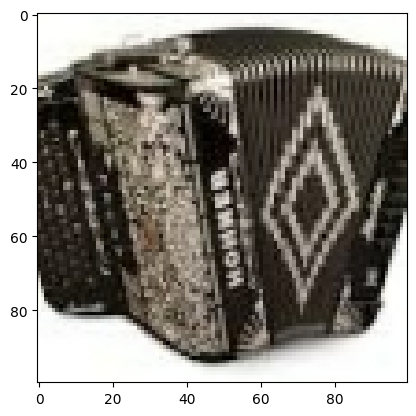

9


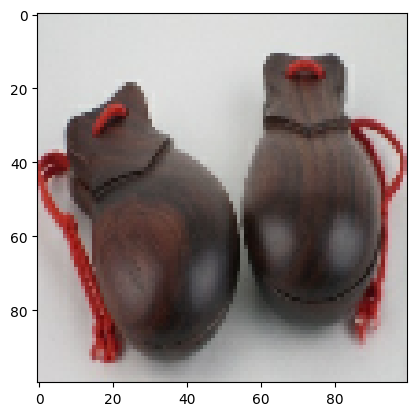

In [17]:
piftrds(5)
piftrds(1000)

In [18]:
# print an image from test dset
def pifds(i):
  print(test_labels[i])
  img = test_images[i]
  plt.imshow(img)
  plt.show()

3


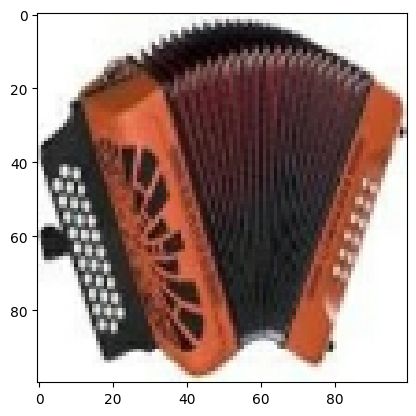

13


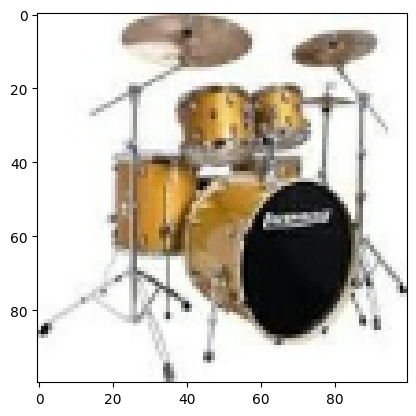

In [19]:
pifds(1)
pifds(55)

In [20]:
def pivfds(i):
  print(val_labels[i])
  img = val_images[i]
  plt.imshow(img)
  plt.show()

3


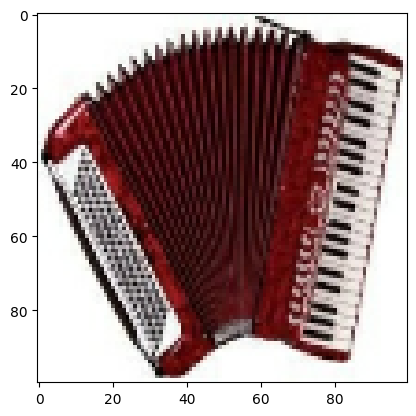

In [21]:
pivfds(1)

# CNN

In [22]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax, MaxPool2D, Conv2D

from tensorflow.keras.layers import Dropout

from tensorflow.keras.optimizers import Adam, RMSprop, SGD

In [23]:
def get_cnn_model():

    model = Sequential()

    model.add(Conv2D(32, kernel_size=3, padding='SAME', activation='relu', input_shape=(100, 100, 3)))
    model.add(MaxPool2D((3, 3)))

    model.add(Conv2D(64, kernel_size=3, padding='SAME', activation='relu'))
    model.add(MaxPool2D((3, 3)))

    model.add(Conv2D(128, kernel_size=3, padding='SAME', activation='relu'))

    model.add(Flatten())

    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(30, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model


In [24]:
model = get_cnn_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 33, 33, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 33, 33, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 11, 11, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 flatten (Flatten)           (None, 15488)             0

In [25]:
# idle query
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [26]:
history = model.fit(train_images[...,np.newaxis],
                    train_labels,
                    validation_data= (val_images[...,np.newaxis],val_labels),
                    epochs=50,
                    batch_size=64)

Epoch 1/50
75/75 [==============================] - 55s 697ms/step - loss: 3.4001 - accuracy: 0.0478 - val_loss: 3.3533 - val_accuracy: 0.0667
Epoch 2/50
75/75 [==============================] - 53s 710ms/step - loss: 3.2735 - accuracy: 0.0832 - val_loss: 3.0751 - val_accuracy: 0.0933
Epoch 3/50
75/75 [==============================] - 51s 687ms/step - loss: 3.0666 - accuracy: 0.1375 - val_loss: 2.7202 - val_accuracy: 0.2600
Epoch 4/50
75/75 [==============================] - 52s 688ms/step - loss: 2.8586 - accuracy: 0.2040 - val_loss: 2.3316 - val_accuracy: 0.3267
Epoch 5/50
75/75 [==============================] - 51s 678ms/step - loss: 2.6894 - accuracy: 0.2573 - val_loss: 2.0423 - val_accuracy: 0.4400
Epoch 6/50
75/75 [==============================] - 50s 672ms/step - loss: 2.4777 - accuracy: 0.3017 - val_loss: 1.8079 - val_accuracy: 0.5000
Epoch 7/50
75/75 [==============================] - 50s 662ms/step - loss: 2.3464 - accuracy: 0.3426 - val_loss: 1.5867 - val_accuracy: 0.5933

In [27]:
test_loss,test_acc = model.evaluate(test_images[...,np.newaxis],test_labels,verbose=2)

5/5 - 0s - loss: 1.3116 - accuracy: 0.7133 - 499ms/epoch - 100ms/step


In [28]:
df = pd.DataFrame(history.history)
df

,loss,accuracy,val_loss,val_accuracy
0,3.400142,0.047778,3.353349,0.066667
1,3.273461,0.083246,3.075102,0.093333
2,3.066560,0.137492,2.720242,0.260000
3,2.858557,0.204048,2.331585,0.326667
4,2.689431,0.257250,2.042280,0.440000
5,2.477693,0.301690,1.807869,0.500000
6,2.346397,0.342583,1.586708,0.593333
7,2.158690,0.388900,1.539787,0.600000
8,2.056770,0.412685,1.409828,0.666667
9,1.904981,0.453369,1.280654,0.620000


[Text(0, 0.5, 'Loss')]

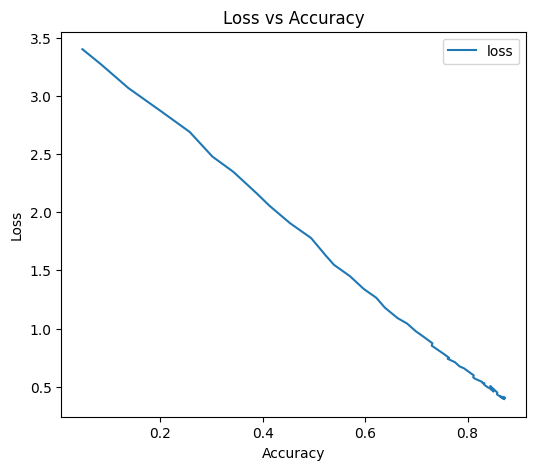

In [29]:
loss_plot = df.plot(x = 'accuracy', y = 'loss' , title = 'Loss vs Accuracy', figsize=(6,5))
loss_plot.set(xlabel='Accuracy')
loss_plot.set(ylabel='Loss')

[Text(0, 0.5, 'Loss')]

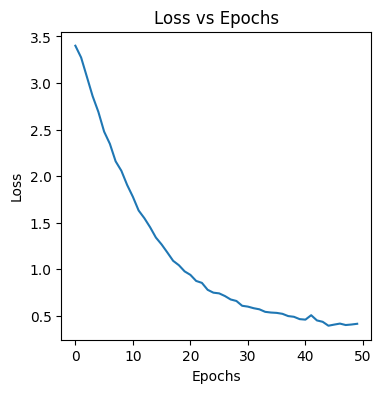

In [31]:
loss_plot = df.plot(y = 'loss' , title = 'Loss vs Epochs', legend= False, figsize=(4,4))
loss_plot.set(xlabel='Epochs')
loss_plot.set(ylabel='Loss')

[Text(0, 0.5, 'Accuracy')]

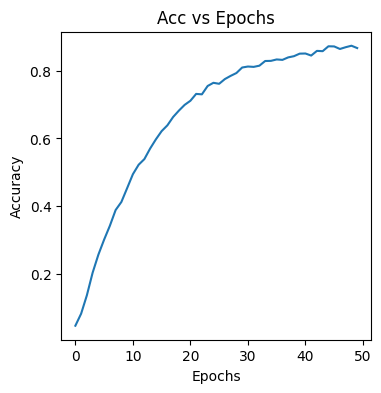

In [33]:
acc_plot = df.plot(y = 'accuracy' , title = 'Acc vs Epochs', legend= False, figsize=(4,4))
acc_plot.set(xlabel='Epochs')
acc_plot.set(ylabel='Accuracy')

[Text(0, 0.5, 'Valid Loss')]

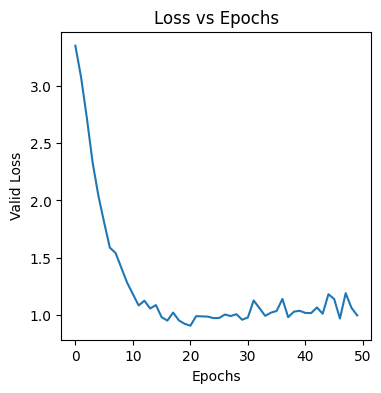

In [34]:
val_loss_plot = df.plot(y = 'val_loss' , title = 'Loss vs Epochs', legend= False, figsize=(4,4))
val_loss_plot.set(xlabel='Epochs')
val_loss_plot.set(ylabel='Valid Loss')

[Text(0, 0.5, 'Valid Accuracy')]

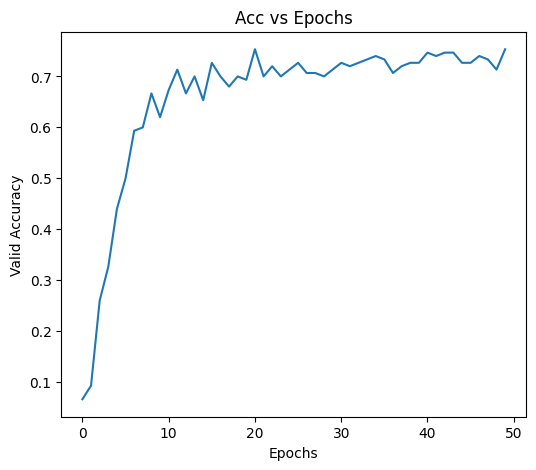

In [35]:
val_acc_plot = df.plot(y = 'val_accuracy' , title = 'Acc vs Epochs', legend= False, figsize=(6,5))
val_acc_plot.set(xlabel='Epochs')
val_acc_plot.set(ylabel='Valid Accuracy')